In [1]:
# Load the data
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Introduction

In this notebook, we will walk through a hacker's approach to statistical thinking, as applied to network analysis.

## Statistics in a Nutshell

All of statistics can be broken down into two activities:

- Descriptively summarizing data. (a.k.a. **"descriptive statistics"**)
- Figuring out whether something happened by random chance. (a.k.a. **"inferential statistics"**)

### Descriptive Statistics

- Centrality measures: mean, median, mode
- Variance measures: inter-quartile range (IQR), variance and standard deviation

### Inferential Statistics

- Models of Randomness (see below)
- Hypothesis Testing
- Fitting Statistical Models

**Models of Randomness**

*Discrete Distributions:*

- Bernoulli: probability p of success in 1 try (e.g. one flip of coin).
- Binomial: probability p of success given n number of tries. `n * bernoulli trials` follows binomial distribution.
- Poisson: processes with a per-unit rate.

*Continuous Distributions:*

- Uniform: equal probability over the range of probable values. Can also be made discrete.
- Normal: everyone's favourite.

## Tests on Synthetic Social Network

In this notebook, we will test whether the synthetic social network we used earlier on follows an Erdos-Renyi model of network connectivity.

In [2]:
G = nx.read_gpickle('Synthetic Social Network.pkl')
len(G.nodes())
len(G.edges())

48

The Erdos-Renyi graph is what is called a "random graph" model. In this model, each potential edge in the graph has a probability `p` of being represented in the graph.

### Question

If a graph has `n` nodes, and `m` edges, assuming that the graph came from an E-R graph, what would be a reasonable estimate for the value `p`?

### Exercise

Using your answer of `p` above, compute a value of estimated `p` for the synthetic social network data.

In [3]:
 # Write your answer here.

n = len(G.nodes())
m = len(G.edges())

p_hat = m / n**2
p_hat 

0.05333333333333334

### Exercise

Using the `networkx` function `erdos_renyi_graph()`, create a single E-R graph, using the value of `p` computed above.

In [4]:
G_er = nx.erdos_renyi_graph(n=n, p=p_hat)

### Exercise

Plot the degree connectivity of the E-R network, sorted from highest to lowest, and plot this on a matplotlib plot. Likewise, do it for the synthetic social network.

Hints:

- `nx.degree(G)` will give you a dictionary of `{node:degree}`.
- The `dict` object has a `dict.values()` function that will return a `dict_values` object, that is iterable.

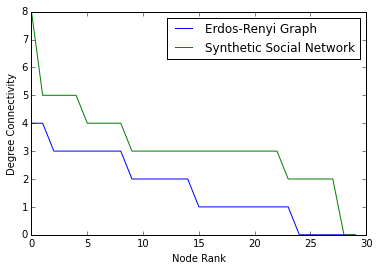

In [5]:
# Answer
plt.plot(sorted(nx.degree(G_er).values(), reverse=True), 
         label='Erdos-Renyi Graph')
plt.plot(sorted(nx.degree(G).values(), reverse=True), 
         label='Synthetic Social Network')
plt.xlabel('Node Rank')
plt.ylabel('Degree Connectivity')
plt.legend()

## Sampling Distributions

The E-R graph that we had just created above is one instance of many possible E-R graphs that could be generated, given the parameters **`n`** and **`p`**. 

The space of all E-R graphs that could be generated is called the **sampling distribution**.

Just now, we had drawn one instance from the sampling distribution.

To shamelessly borrow a quote from Jake Vanderplas' slides (linked below), in general, computing the sampling distribution is hard, but simulating it is easy.

## Hypothesis Testing

Hypothesis testing is about asking whether the data that we have came from some null model of randomness. First, we set up two competing hypotheses at the beginning, a **null** hypothesis that the data came from some random model, and an **alternative** hypothesis that the data did not come from that random model. Secondly, we compute whether, at some comfortable probabilty of being incorrect, to reject the "null" hypothesis, based on the distribution of some test statistic.

## Defining a Test Statistic

The mean is one of many summarizing statistics that we can use to gauge whether the data on hand came from some random distribution. We can then conduct a hypothesis test to assess how probable it was that the synthetic social network came from an E-R `(n=30, p=0.05)` graph, by comparing the mean of the degree distribution from the synthetic network from the E-R network.

### Exercise

Compute the mean of the degree distribution of the E-R `(n=30, p=0.05)` graph created above.

In [6]:
# Answer for E-R graph.
er_mean = np.mean([i for i in nx.degree(G_er).values()])
er_mean

1.6666666666666667

In [7]:
# Answer for synthetic social network.
syn_mean = np.mean([i for i in nx.degree(G).values()])
syn_mean

3.2000000000000002

## Figuring Out the Sampling Distribution

A logical procedure for conducting this hypothesis test is to simulate a sampling distribution of ~1000 draws from the E-R `(n=30, p=0.05)` space. We can then compute the probability of seeing the a mean degree distribution greater than or equal to the observed mean.

### Exercise

Complete the function below to draw 1000 instances of the E-R `(n=30, p=0.05)` graph, and store the distribution of mean node degrees. Ensure that the following parameters are passable into the function:

- `n_instances`
- `n_nodes`
- `p_connection`

In [8]:
# Answer

def simulate_mean_degree(n_instances, n_nodes, p_connection):
    
    means = np.zeros(n_instances)
    
    for i in range(n_instances):
        # Fill in the code below.
        G_er = nx.erdos_renyi_graph(n=n_nodes, p=p_connection)
        deg_distr = [j for j in nx.degree(G_er).values()]
        means[i] = np.mean(deg_distr)

    return means

n_instances=1000
means = simulate_mean_degree(n_instances=n_instances,
                             n_nodes=len(G.nodes()),
                             p_connection=p_hat)

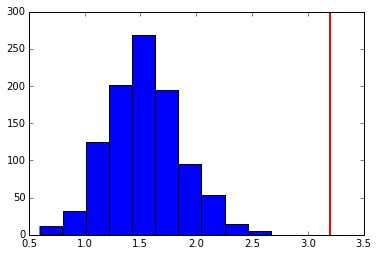

In [9]:
# Plot a histogram of the means, and annotate on the x-axis where the mean of the synthetic network lies.
plt.hist(means)
plt.axvline(x=syn_mean, linewidth=2, color='red')

In [10]:
# Compute the probability that the synthetic network's mean degree would have been seen by chance or not. 
# This is where the actual hypothesis test comes in.
np.sum(means >= syn_mean) / n_instances

0.0

## Interim Conclusion

We would conclude that the synthetic social network generated above would not have come from an E-R `(n=30, p=0.05)` graph. But what if we had estimated the value of `p_hat` incorrectly?

### Exercise

Re-calculate `p_hat`, and calculate the probability of seeing the mean degree value by random chance under an E-R model with a new `p_hat` value.

In [11]:
p_hat_new = 2 * m / n**2
means_new = simulate_mean_degree(n_instances, 30, p_hat_new)
np.sum(means_new >= syn_mean) / n_instances

0.40600000000000003

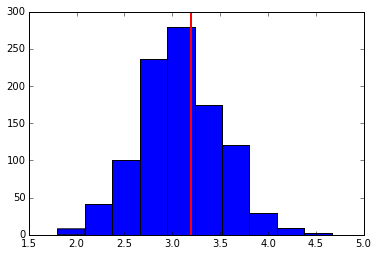

In [12]:
# Plot this for yourself to convince yourself.
plt.hist(means_new)
plt.axvline(x=syn_mean, linewidth=2, color='red')

## Conclusion

We would reject the hypothesis that the synthetic social network came from an E-R graph with `n=30`, `p=0.05`.

We would not reject the hypothesis that the synthetic social network came from an E-R graph with `n=30`, `p=0.10`. *That said, we knew in advance that `p=0.10` to begin with.*

# Further Reading

Jake Vanderplas' "Statistics for Hackers" slides: https://speakerdeck.com/jakevdp/statistics-for-hackers

Allen Downey's "There is Only One Test": http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html